In [1]:
from __future__ import print_function

import pandas as pd
import numpy as np

from keras.preprocessing.text import text_to_word_sequence
import pandas as pd
from keras.preprocessing.text import Tokenizer
import numpy as np
from bs4 import BeautifulSoup
import logging
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, MaxPooling1D, Flatten
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D, BatchNormalization
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from keras import initializers, regularizers, constraints

In [2]:
df1 = pd.read_csv('df1.csv')
df2 = pd.read_csv('df2.csv')
df3 = pd.read_csv('df3.csv')
df4 = pd.read_csv('df4.csv')
df5 = pd.read_csv('df5.csv')
df6 = pd.read_csv('df6.csv')
df7 = pd.read_csv('df7.csv')
df8 = pd.read_csv('df8.csv')
df9 = pd.read_csv('df9.csv')
df10 = pd.read_csv('df10.csv')

In [25]:
df8.head()

,category,rating,text,label
0,Books_5,5,I'm hooked on this writer and will be reading ...,CG
1,Books_5,5,Good book and exactly as described. The charac...,CG
2,Books_5,5,Fitting that the ultimate survivor of an epide...,CG
3,Books_5,5,Absolutely loved every word! We have the book...,CG
4,Books_5,5,"I loved it! It was a real, believable, and eng...",CG


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

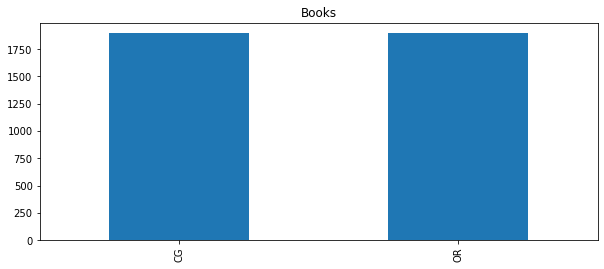

In [26]:
import matplotlib.pyplot as plt
from google.colab import files

my_tags = ['CG','OR']
plt.figure(figsize=(10,4))
plt.title('Books')
df9.label.value_counts().plot(kind='bar')

plt.savefig("figure9.pdf")
files.download("figure9.pdf")

plt.savefig("figure9.eps")
files.download("figure9.eps")

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4056 entries, 0 to 4055
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  4056 non-null   object
 1   rating    4056 non-null   int64 
 2   text      4056 non-null   object
 3   label     4056 non-null   object
dtypes: int64(1), object(3)
memory usage: 126.9+ KB


In [ ]:
df1.tail()

,category,text,label
2375,Home_and_Kitchen_5,I bought the king size and it is the best. I w...,CG
19534,Pet_Supplies_5,My dog likes it and it has kept her occupied f...,CG
6949,Sports_and_Outdoors_5,Very pleased. it came well packaged in a nice ...,OR
1282,Home_and_Kitchen_5,Luxurious! These sheets are soft and comforta...,CG
5321,Sports_and_Outdoors_5,I played rugby in college. I was an inch tall ...,CG


In [29]:
df1=df1.drop(columns=['rating'],axis=1)
df2=df2.drop(columns=['rating'],axis=1)
df3=df3.drop(columns=['rating'],axis=1)
df4=df4.drop(columns=['rating'],axis=1)
df5=df5.drop(columns=['rating'],axis=1)
df6=df6.drop(columns=['rating'],axis=1)
df7=df7.drop(columns=['rating'],axis=1)
df8=df8.drop(columns=['rating'],axis=1)
df9=df9.drop(columns=['rating'],axis=1)
df10=df10.drop(columns=['rating'],axis=1)

In [30]:
df1=df1.drop(columns=['category'],axis=1)
df2=df2.drop(columns=['category'],axis=1)
df3=df3.drop(columns=['category'],axis=1)
df4=df4.drop(columns=['category'],axis=1)
df5=df5.drop(columns=['category'],axis=1)
df6=df6.drop(columns=['category'],axis=1)
df7=df7.drop(columns=['category'],axis=1)
df8=df8.drop(columns=['category'],axis=1)
df9=df9.drop(columns=['category'],axis=1)
df10=df10.drop(columns=['category'],axis=1)

In [31]:
# Import label encoder 
from sklearn import preprocessing 

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'species'. 
df1['label']= label_encoder.fit_transform(df1['label']) 
df2['label']= label_encoder.fit_transform(df2['label']) 
df3['label']= label_encoder.fit_transform(df3['label']) 
df4['label']= label_encoder.fit_transform(df4['label']) 
df5['label']= label_encoder.fit_transform(df5['label']) 
df6['label']= label_encoder.fit_transform(df6['label']) 
df7['label']= label_encoder.fit_transform(df7['label']) 
df8['label']= label_encoder.fit_transform(df8['label']) 
df9['label']= label_encoder.fit_transform(df9['label']) 
df10['label']= label_encoder.fit_transform(df10['label']) 

df1['label'].unique() 

array([0, 1])

In [ ]:
df2.head()

,text,label
0,"perfect have a dart board, an island with a be...",0
1,Gift for 30 year old woman. The only problem i...,0
2,Holds up great at the range. The only problem ...,0
3,"This thing works amazingly well, and has kept ...",0
4,I've bought four of these and have been very p...,0


In [ ]:
df1.describe()

,label
count,4056.000000
mean,0.500000
std,0.500062
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [32]:
from nltk.corpus import stopwords
import re

In [33]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [34]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower().split()
    text = " ".join(text)
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+\-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)
    return text
    
df1['text'] = df1['text'].apply(clean_text)
df2['text'] = df2['text'].apply(clean_text)
df3['text'] = df3['text'].apply(clean_text)
df4['text'] = df4['text'].apply(clean_text)
df5['text'] = df5['text'].apply(clean_text)
df6['text'] = df6['text'].apply(clean_text)
df7['text'] = df7['text'].apply(clean_text)
df8['text'] = df8['text'].apply(clean_text)
df9['text'] = df9['text'].apply(clean_text)
df10['text'] = df10['text'].apply(clean_text)

In [35]:
X1 = df1.text
y1 = df1.label
X2 = df2.text
y2 = df2.label
X3 = df3.text
y3 = df3.label
X4 = df4.text
y4 = df4.label
X5 = df5.text
y5 = df5.label
X6 = df6.text
y6 = df6.label
X7 = df7.text
y7 = df7.label
X8 = df8.text
y8 = df8.label
X9 = df9.text
y9 = df9.label
X10 = df10.text
y10 = df10.label

In [36]:
X1 = X1.map(lambda a: clean_text(a))
X2 = X2.map(lambda a: clean_text(a))
X3 = X3.map(lambda a: clean_text(a))
X4 = X4.map(lambda a: clean_text(a))
X5 = X5.map(lambda a: clean_text(a))
X6 = X6.map(lambda a: clean_text(a))
X7 = X7.map(lambda a: clean_text(a))
X8 = X8.map(lambda a: clean_text(a))
X9 = X9.map(lambda a: clean_text(a))
X10 = X10.map(lambda a: clean_text(a))

In [37]:
def text_to_wordlist(text):    
    #Remove Special Characters
    text = re.sub(r'[^a-z\d ]', " ", text)
    text = re.sub(r'\d+', '_num_', text)    
    return(text)

In [38]:
X1 = X1.map(lambda a: text_to_wordlist(a))
X2 = X2.map(lambda a: text_to_wordlist(a))
X3 = X3.map(lambda a: text_to_wordlist(a))
X4 = X4.map(lambda a: text_to_wordlist(a))
X5 = X5.map(lambda a: text_to_wordlist(a))
X6 = X6.map(lambda a: text_to_wordlist(a))
X7 = X7.map(lambda a: text_to_wordlist(a))
X8 = X8.map(lambda a: text_to_wordlist(a))
X9 = X9.map(lambda a: text_to_wordlist(a))
X10 = X10.map(lambda a: text_to_wordlist(a))

In [39]:
train1, test1, y_train1, y_test1 = train_test_split(X1,y1,stratify=y1,random_state=42)
train2, test2, y_train2, y_test2 = train_test_split(X2,y2,stratify=y2,random_state=42)
train3, test3, y_train3, y_test3 = train_test_split(X3,y3,stratify=y3,random_state=42)
train4, test4, y_train4, y_test4 = train_test_split(X4,y4,stratify=y4,random_state=42)
train5, test5, y_train5, y_test5 = train_test_split(X5,y5,stratify=y5,random_state=42)
train6, test6, y_train6, y_test6 = train_test_split(X6,y6,stratify=y6,random_state=42)
train7, test7, y_train7, y_test7 = train_test_split(X7,y7,stratify=y7,random_state=42)
train8, test8, y_train8, y_test8 = train_test_split(X8,y8,stratify=y8,random_state=42)
train9, test9, y_train9, y_test9 = train_test_split(X9,y9,stratify=y9,random_state=42)
train10, test10, y_train10, y_test10 = train_test_split(X10,y10,stratify=y10,random_state=42)

In [40]:
tokenizer1 = Tokenizer(num_words=None,lower=True,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',split=' ',char_level=False)
tokenizer1.fit_on_texts(X1)
x_train1 = tokenizer1.texts_to_sequences(train1)
x_test1 = tokenizer1.texts_to_sequences(test1)
word_index1 = tokenizer1.word_index
X1 = tokenizer1.texts_to_sequences(X1)

tokenizer2 = Tokenizer(num_words=None,lower=True,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',split=' ',char_level=False)
tokenizer2.fit_on_texts(X2)
x_train2 = tokenizer2.texts_to_sequences(train2)
x_test2 = tokenizer2.texts_to_sequences(test2)
word_index2 = tokenizer2.word_index
X2 = tokenizer2.texts_to_sequences(X2)

tokenizer3 = Tokenizer(num_words=None,lower=True,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',split=' ',char_level=False)
tokenizer3.fit_on_texts(X3)
x_train3 = tokenizer3.texts_to_sequences(train3)
x_test3 = tokenizer3.texts_to_sequences(test3)
word_index3 = tokenizer3.word_index
X3 = tokenizer3.texts_to_sequences(X3)

tokenizer4 = Tokenizer(num_words=None,lower=True,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',split=' ',char_level=False)
tokenizer4.fit_on_texts(X4)
x_train4 = tokenizer4.texts_to_sequences(train4)
x_test4 = tokenizer4.texts_to_sequences(test4)
word_index4 = tokenizer4.word_index
X4 = tokenizer4.texts_to_sequences(X4)

tokenizer5 = Tokenizer(num_words=None,lower=True,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',split=' ',char_level=False)
tokenizer5.fit_on_texts(X5)
x_train5 = tokenizer5.texts_to_sequences(train5)
x_test5 = tokenizer5.texts_to_sequences(test5)
word_index5 = tokenizer5.word_index
X5 = tokenizer5.texts_to_sequences(X5)

tokenizer6 = Tokenizer(num_words=None,lower=True,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',split=' ',char_level=False)
tokenizer6.fit_on_texts(X6)
x_train6 = tokenizer6.texts_to_sequences(train6)
x_test6 = tokenizer6.texts_to_sequences(test6)
word_index6 = tokenizer6.word_index
X6 = tokenizer6.texts_to_sequences(X6)

tokenizer7 = Tokenizer(num_words=None,lower=True,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',split=' ',char_level=False)
tokenizer7.fit_on_texts(X7)
x_train7 = tokenizer7.texts_to_sequences(train7)
x_test7 = tokenizer7.texts_to_sequences(test7)
word_index7 = tokenizer7.word_index
X7 = tokenizer7.texts_to_sequences(X7)

tokenizer8 = Tokenizer(num_words=None,lower=True,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',split=' ',char_level=False)
tokenizer8.fit_on_texts(X8)
x_train8 = tokenizer8.texts_to_sequences(train8)
x_test8 = tokenizer8.texts_to_sequences(test8)
word_index8 = tokenizer8.word_index
X8 = tokenizer8.texts_to_sequences(X8)

tokenizer9 = Tokenizer(num_words=None,lower=True,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',split=' ',char_level=False)
tokenizer9.fit_on_texts(X9)
x_train9 = tokenizer9.texts_to_sequences(train9)
x_test9 = tokenizer9.texts_to_sequences(test9)
word_index9 = tokenizer9.word_index
X9 = tokenizer9.texts_to_sequences(X9)

tokenizer10 = Tokenizer(num_words=None,lower=True,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',split=' ',char_level=False)
tokenizer10.fit_on_texts(X10)
x_train10 = tokenizer10.texts_to_sequences(train10)
x_test10 = tokenizer10.texts_to_sequences(test10)
word_index10 = tokenizer10.word_index
X10 = tokenizer10.texts_to_sequences(X10)

In [42]:
vocab_size1 = len(word_index1)
print('Vocab size: {}'.format(vocab_size1))
longest1 = max(len(seq) for seq in X1)
print("Longest comment size: {}".format(longest1))
average1 = np.mean([len(seq) for seq in X1])
print("Average comment size: {}".format(average1))
stdev1 = np.std([len(seq) for seq in X1])
print("Stdev of comment size: {}".format(stdev1))
max_len1 = int(average1 + stdev1 * 3)
print('Max comment size: {}'.format(max_len1))

vocab_size2 = len(word_index2)
print('Vocab size: {}'.format(vocab_size2))
longest2 = max(len(seq) for seq in X2)
print("Longest comment size: {}".format(longest2))
average2 = np.mean([len(seq) for seq in X2])
print("Average comment size: {}".format(average2))
stdev2 = np.std([len(seq) for seq in X2])
print("Stdev of comment size: {}".format(stdev2))
max_len2 = int(average2 + stdev2 * 3)
print('Max comment size: {}'.format(max_len2))

vocab_size3 = len(word_index3)
print('Vocab size: {}'.format(vocab_size3))
longest3 = max(len(seq) for seq in X3)
print("Longest comment size: {}".format(longest3))
average3 = np.mean([len(seq) for seq in X3])
print("Average comment size: {}".format(average3))
stdev3 = np.std([len(seq) for seq in X3])
print("Stdev of comment size: {}".format(stdev3))
max_len3 = int(average3 + stdev3 * 3)
print('Max comment size: {}'.format(max_len3))

vocab_size4 = len(word_index4)
print('Vocab size: {}'.format(vocab_size4))
longest4 = max(len(seq) for seq in X4)
print("Longest comment size: {}".format(longest4))
average4 = np.mean([len(seq) for seq in X4])
print("Average comment size: {}".format(average4))
stdev4 = np.std([len(seq) for seq in X4])
print("Stdev of comment size: {}".format(stdev4))
max_len4 = int(average4 + stdev4 * 3)
print('Max comment size: {}'.format(max_len4))

vocab_size5 = len(word_index5)
print('Vocab size: {}'.format(vocab_size5))
longest5 = max(len(seq) for seq in X5)
print("Longest comment size: {}".format(longest5))
average5 = np.mean([len(seq) for seq in X5])
print("Average comment size: {}".format(average5))
stdev5 = np.std([len(seq) for seq in X5])
print("Stdev of comment size: {}".format(stdev5))
max_len5 = int(average5 + stdev5 * 3)
print('Max comment size: {}'.format(max_len5))

vocab_size6 = len(word_index6)
print('Vocab size: {}'.format(vocab_size6))
longest6 = max(len(seq) for seq in X6)
print("Longest comment size: {}".format(longest6))
average6 = np.mean([len(seq) for seq in X6])
print("Average comment size: {}".format(average6))
stdev6 = np.std([len(seq) for seq in X6])
print("Stdev of comment size: {}".format(stdev6))
max_len6 = int(average6 + stdev6 * 3)
print('Max comment size: {}'.format(max_len6))

vocab_size7 = len(word_index7)
print('Vocab size: {}'.format(vocab_size7))
longest7 = max(len(seq) for seq in X7)
print("Longest comment size: {}".format(longest7))
average7 = np.mean([len(seq) for seq in X7])
print("Average comment size: {}".format(average7))
stdev7 = np.std([len(seq) for seq in X7])
print("Stdev of comment size: {}".format(stdev7))
max_len7 = int(average7 + stdev7 * 3)
print('Max comment size: {}'.format(max_len7))

vocab_size8 = len(word_index8)
print('Vocab size: {}'.format(vocab_size8))
longest8 = max(len(seq) for seq in X8)
print("Longest comment size: {}".format(longest8))
average8 = np.mean([len(seq) for seq in X8])
print("Average comment size: {}".format(average8))
stdev8 = np.std([len(seq) for seq in X8])
print("Stdev of comment size: {}".format(stdev8))
max_len8 = int(average8 + stdev8 * 3)
print('Max comment size: {}'.format(max_len8))

vocab_size9 = len(word_index9)
print('Vocab size: {}'.format(vocab_size9))
longest9 = max(len(seq) for seq in X9)
print("Longest comment size: {}".format(longest9))
average9 = np.mean([len(seq) for seq in X9])
print("Average comment size: {}".format(average9))
stdev9 = np.std([len(seq) for seq in X9])
print("Stdev of comment size: {}".format(stdev9))
max_len9 = int(average9 + stdev9 * 3)
print('Max comment size: {}'.format(max_len9))

vocab_size10 = len(word_index10)
print('Vocab size: {}'.format(vocab_size10))
longest10 = max(len(seq) for seq in X10)
print("Longest comment size: {}".format(longest10))
average10 = np.mean([len(seq) for seq in X10])
print("Average comment size: {}".format(average10))
stdev10 = np.std([len(seq) for seq in X10])
print("Stdev of comment size: {}".format(stdev10))
max_len10 = int(average10 + stdev10 * 3)
print('Max comment size: {}'.format(max_len10))

Vocab size: 8443
Longest comment size: 355
Average comment size: 61.55004930966469
Stdev of comment size: 66.94322169543409
Max comment size: 262
Vocab size: 9255
Longest comment size: 377
Average comment size: 64.2227572225038
Stdev of comment size: 68.60651445561093
Max comment size: 270
Vocab size: 9010
Longest comment size: 383
Average comment size: 70.4821965897693
Stdev of comment size: 70.15267727160948
Max comment size: 280
Vocab size: 13865
Longest comment size: 377
Average comment size: 74.74944258639911
Stdev of comment size: 75.7261424341773
Max comment size: 301
Vocab size: 8646
Longest comment size: 370
Average comment size: 66.04276827371694
Stdev of comment size: 69.3164170091526
Max comment size: 273
Vocab size: 8624
Longest comment size: 361
Average comment size: 63.6088387400094
Stdev of comment size: 65.96133540650283
Max comment size: 261
Vocab size: 13076
Longest comment size: 366
Average comment size: 81.25285412262157
Stdev of comment size: 73.03416268374203
Max

In [43]:
from keras_preprocessing.sequence import pad_sequences

In [44]:
processed_post_x_train1 = pad_sequences(x_train1, maxlen=max_len1, padding='post', truncating='post')
processed_post_x_test1 = pad_sequences(x_test1, maxlen=max_len1, padding='post', truncating='post')
processed_post_x_train2 = pad_sequences(x_train2, maxlen=max_len2, padding='post', truncating='post')
processed_post_x_test2 = pad_sequences(x_test2, maxlen=max_len2, padding='post', truncating='post')
processed_post_x_train3 = pad_sequences(x_train3, maxlen=max_len3, padding='post', truncating='post')
processed_post_x_test3 = pad_sequences(x_test3, maxlen=max_len3, padding='post', truncating='post')
processed_post_x_train4 = pad_sequences(x_train4, maxlen=max_len4, padding='post', truncating='post')
processed_post_x_test4 = pad_sequences(x_test4, maxlen=max_len4, padding='post', truncating='post')
processed_post_x_train5 = pad_sequences(x_train5, maxlen=max_len5, padding='post', truncating='post')
processed_post_x_test5 = pad_sequences(x_test5, maxlen=max_len5, padding='post', truncating='post')
processed_post_x_train6 = pad_sequences(x_train6, maxlen=max_len6, padding='post', truncating='post')
processed_post_x_test6 = pad_sequences(x_test6, maxlen=max_len6, padding='post', truncating='post')
processed_post_x_train7 = pad_sequences(x_train7, maxlen=max_len7, padding='post', truncating='post')
processed_post_x_test7 = pad_sequences(x_test7, maxlen=max_len7, padding='post', truncating='post')
processed_post_x_train8 = pad_sequences(x_train8, maxlen=max_len8, padding='post', truncating='post')
processed_post_x_test8 = pad_sequences(x_test8, maxlen=max_len8, padding='post', truncating='post')
processed_post_x_train9 = pad_sequences(x_train9, maxlen=max_len9, padding='post', truncating='post')
processed_post_x_test9 = pad_sequences(x_test9, maxlen=max_len9, padding='post', truncating='post')
processed_post_x_train10 = pad_sequences(x_train10, maxlen=max_len10, padding='post', truncating='post')
processed_post_x_test10 = pad_sequences(x_test10, maxlen=max_len10, padding='post', truncating='post')


In [45]:
processed_x_train1 = pad_sequences(x_train1, maxlen=max_len1)
processed_x_test1 = pad_sequences(x_test1, maxlen=max_len1)
processed_x_train2 = pad_sequences(x_train2, maxlen=max_len2)
processed_x_test2 = pad_sequences(x_test2, maxlen=max_len2)
processed_x_train3 = pad_sequences(x_train3, maxlen=max_len3)
processed_x_test3 = pad_sequences(x_test3, maxlen=max_len3)
processed_x_train4 = pad_sequences(x_train4, maxlen=max_len4)
processed_x_test4 = pad_sequences(x_test4, maxlen=max_len4)
processed_x_train5 = pad_sequences(x_train5, maxlen=max_len5)
processed_x_test5 = pad_sequences(x_test5, maxlen=max_len5)
processed_x_train6 = pad_sequences(x_train6, maxlen=max_len6)
processed_x_test6 = pad_sequences(x_test6, maxlen=max_len6)
processed_x_train7 = pad_sequences(x_train7, maxlen=max_len7)
processed_x_test7 = pad_sequences(x_test7, maxlen=max_len7)
processed_x_train8 = pad_sequences(x_train8, maxlen=max_len8)
processed_x_test8 = pad_sequences(x_test8, maxlen=max_len8)
processed_x_train9 = pad_sequences(x_train9, maxlen=max_len9)
processed_x_test9 = pad_sequences(x_test9, maxlen=max_len9)
processed_x_train10 = pad_sequences(x_train10, maxlen=max_len10)
processed_x_test10 = pad_sequences(x_test10, maxlen=max_len10)

In [46]:
print('x_train shape:', processed_x_train1.shape)
print('x_test shape:', processed_x_test1.shape)
print('x_train shape:', processed_x_train2.shape)
print('x_test shape:', processed_x_test2.shape)
print('x_train shape:', processed_x_train3.shape)
print('x_test shape:', processed_x_test3.shape)
print('x_train shape:', processed_x_train4.shape)
print('x_test shape:', processed_x_test4.shape)
print('x_train shape:', processed_x_train5.shape)
print('x_test shape:', processed_x_test5.shape)
print('x_train shape:', processed_x_train6.shape)
print('x_test shape:', processed_x_test6.shape)
print('x_train shape:', processed_x_train7.shape)
print('x_test shape:', processed_x_test7.shape)
print('x_train shape:', processed_x_train8.shape)
print('x_test shape:', processed_x_test8.shape)
print('x_train shape:', processed_x_train9.shape)
print('x_test shape:', processed_x_test9.shape)
print('x_train shape:', processed_x_train10.shape)
print('x_test shape:', processed_x_test10.shape)

x_train shape: (3042, 262)
x_test shape: (1014, 262)
x_train shape: (2959, 270)
x_test shape: (987, 270)
x_train shape: (2991, 280)
x_test shape: (997, 280)
x_train shape: (2691, 301)
x_test shape: (897, 301)
x_train shape: (2893, 273)
x_test shape: (965, 273)
x_train shape: (3190, 261)
x_test shape: (1064, 261)
x_train shape: (3547, 300)
x_test shape: (1183, 300)
x_train shape: (3277, 316)
x_test shape: (1093, 316)
x_train shape: (2845, 265)
x_test shape: (949, 265)
x_train shape: (2886, 258)
x_test shape: (962, 258)


In [ ]:
!pip install tensorflow-gpu==2.0.0 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 380.8 MB 38 kB/s 
     |████████████████████████████████| 50 kB 7.3 MB/s 
     |████████████████████████████████| 449 kB 59.6 MB/s 
     |████████████████████████████████| 3.8 MB 51.6 MB/s 
     |████████████████████████████████| 152 kB 68.8 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=ec5b441d42d3e029eab9891ffac7593c3759f8b36bbc2f173097b917722b508a
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: cachetools
    Found existing installation: cachetools 5.2.0
    Uninstalling cachetools-5.2.0:
      Successfully uninstalled cachetools-5.2.0
  Attempting uninstall: google-auth
    Found existing installation: google-auth 2.14.1
    Uninstalling google-auth-2.14.1:
      Successfully uninstalled google-auth-2

In [47]:
import keras.backend
from keras.models import Sequential, load_model
from keras.layers import CuDNNGRU, Dense, Conv1D, MaxPooling1D
from keras.layers import Dropout, GlobalMaxPooling1D, BatchNormalization, LSTM
from keras.layers import Bidirectional
from keras.layers import Embedding
from keras.optimizers import Nadam
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt


In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
from keras.layers import Layer

In [49]:
import os

In [50]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip
!ls
!pwd

--2022-12-02 12:06:32--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-12-02 12:06:32--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-12-02 12:06:33--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [51]:
print('Indexing word vectors.')

embeddings_index = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Indexing word vectors.
Found 400000 word vectors.


In [52]:
embedding_dim = 100
k = 0
embedding_matrix1 = np.zeros((len(word_index1) + 1, embedding_dim))
embedding_matrix2 = np.zeros((len(word_index2) + 1, embedding_dim))
embedding_matrix3 = np.zeros((len(word_index3) + 1, embedding_dim))
embedding_matrix4 = np.zeros((len(word_index4) + 1, embedding_dim))
embedding_matrix5 = np.zeros((len(word_index5) + 1, embedding_dim))
embedding_matrix6 = np.zeros((len(word_index6) + 1, embedding_dim))
embedding_matrix7 = np.zeros((len(word_index7) + 1, embedding_dim))
embedding_matrix8 = np.zeros((len(word_index8) + 1, embedding_dim))
embedding_matrix9 = np.zeros((len(word_index9) + 1, embedding_dim))
embedding_matrix10 = np.zeros((len(word_index10) + 1, embedding_dim))
for word, i in word_index1.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        k += 1
        embedding_matrix1[i] = embedding_vector

for word, i in word_index2.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        k += 1
        embedding_matrix2[i] = embedding_vector

for word, i in word_index3.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        k += 1
        embedding_matrix3[i] = embedding_vector

for word, i in word_index4.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        k += 1
        embedding_matrix4[i] = embedding_vector

for word, i in word_index5.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        k += 1
        embedding_matrix5[i] = embedding_vector

for word, i in word_index6.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        k += 1
        embedding_matrix6[i] = embedding_vector

for word, i in word_index7.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        k += 1
        embedding_matrix7[i] = embedding_vector

for word, i in word_index8.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        k += 1
        embedding_matrix8[i] = embedding_vector

for word, i in word_index9.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        k += 1
        embedding_matrix9[i] = embedding_vector

for word, i in word_index10.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        k += 1
        embedding_matrix10[i] = embedding_vector

In [53]:
from keras.optimizers import SGD
# Initate model
def get_model(embedding_matrix, max_len, vocab_size):
  model = Sequential()
  model.add(Embedding(vocab_size + 1, embedding_dim, weights=[embedding_matrix], input_length=max_len, trainable=True))
  model.add(LSTM(60, return_sequences=True, name='lstm_layer1'))
  model.add(LSTM(30, return_sequences=True, name='lstm_layer2'))
  model.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))
  model.add(MaxPooling1D(3))
  model.add(GlobalMaxPooling1D())
  model.add(BatchNormalization())
  model.add(Dense(64, activation='relu',kernel_regularizer=l2(0.17),bias_regularizer=l2(0.01)))
  model.add(Dropout(0.3))
  model.add(Dense(32, activation='sigmoid',kernel_regularizer=l2(0.19),bias_regularizer=l2(0.01)))
  model.add(Dropout(0.3))
  #model.add(Dense(16, kernel_regularizer=l2(0.001), activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(1, activation='sigmoid'))
  model.summary()
  return model

In [54]:
model1 = get_model(embedding_matrix1,max_len1,vocab_size1)
model1.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
model2 = get_model(embedding_matrix2,max_len2,vocab_size2)
model2.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
model3 = get_model(embedding_matrix3,max_len3,vocab_size3)
model3.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
model4 = get_model(embedding_matrix4,max_len4,vocab_size4)
model4.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
model5 = get_model(embedding_matrix5,max_len5,vocab_size5)
model5.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
model6 = get_model(embedding_matrix6,max_len6,vocab_size6)
model6.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
model7 = get_model(embedding_matrix7,max_len7,vocab_size7)
model7.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
model8 = get_model(embedding_matrix8,max_len8,vocab_size8)
model8.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
model9 = get_model(embedding_matrix9,max_len9,vocab_size9)
model9.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
model10 = get_model(embedding_matrix10,max_len10,vocab_size10)
model10.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 262, 100)          844400    
                                                                 
 lstm_layer1 (LSTM)          (None, 262, 60)           38640     
                                                                 
 lstm_layer2 (LSTM)          (None, 262, 30)           10920     
                                                                 
 conv1d (Conv1D)             (None, 262, 128)          11648     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 87, 128)          0         
 )                                                               
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                         

In [55]:
history1 = model1.fit(processed_x_train1,y_train1,validation_data=(processed_x_test1,y_test1),epochs=20,batch_size=32,verbose=1)
history2 = model2.fit(processed_x_train2,y_train2,validation_data=(processed_x_test2,y_test2),epochs=20,batch_size=32,verbose=1)
history3 = model3.fit(processed_x_train3,y_train3,validation_data=(processed_x_test3,y_test3),epochs=20,batch_size=32,verbose=1)
history4 = model4.fit(processed_x_train4,y_train4,validation_data=(processed_x_test4,y_test4),epochs=20,batch_size=32,verbose=1)
history5 = model5.fit(processed_x_train5,y_train5,validation_data=(processed_x_test5,y_test5),epochs=20,batch_size=32,verbose=1)
history6 = model6.fit(processed_x_train6,y_train6,validation_data=(processed_x_test6,y_test6),epochs=20,batch_size=32,verbose=1)
history7 = model7.fit(processed_x_train7,y_train7,validation_data=(processed_x_test7,y_test7),epochs=20,batch_size=32,verbose=1)
history8 = model8.fit(processed_x_train8,y_train8,validation_data=(processed_x_test8,y_test8),epochs=20,batch_size=32,verbose=1)
history9 = model9.fit(processed_x_train9,y_train9,validation_data=(processed_x_test9,y_test9),epochs=20,batch_size=32,verbose=1)
history10 = model10.fit(processed_x_train10,y_train10,validation_data=(processed_x_test10,y_test10),epochs=20,batch_size=32,verbose=1)

Epoch 1/20
96/96 [==============================] - 17s 36ms/step - loss: 12.3574 - accuracy: 0.6621 - val_loss: 5.2962 - val_accuracy: 0.6893
Epoch 2/20
96/96 [==============================] - 2s 26ms/step - loss: 2.8537 - accuracy: 0.7521 - val_loss: 1.4824 - val_accuracy: 0.8146
Epoch 3/20
96/96 [==============================] - 2s 26ms/step - loss: 0.9767 - accuracy: 0.8330 - val_loss: 0.7033 - val_accuracy: 0.9142
Epoch 4/20
96/96 [==============================] - 3s 26ms/step - loss: 0.6391 - accuracy: 0.8692 - val_loss: 0.5447 - val_accuracy: 0.8994
Epoch 5/20
96/96 [==============================] - 2s 26ms/step - loss: 0.5476 - accuracy: 0.8958 - val_loss: 0.5783 - val_accuracy: 0.8452
Epoch 6/20
96/96 [==============================] - 2s 25ms/step - loss: 0.4859 - accuracy: 0.9237 - val_loss: 0.4686 - val_accuracy: 0.9201
Epoch 7/20
96/96 [==============================] - 2s 26ms/step - loss: 0.5393 - accuracy: 0.8741 - val_loss: 0.4633 - val_accuracy: 0.8945
Epoch 8/20


In [56]:
model1.evaluate(processed_x_test1,y_test1)
model2.evaluate(processed_x_test2,y_test2)
model3.evaluate(processed_x_test3,y_test3)
model4.evaluate(processed_x_test4,y_test4)
model5.evaluate(processed_x_test5,y_test5)
model6.evaluate(processed_x_test6,y_test6)
model7.evaluate(processed_x_test7,y_test7)
model8.evaluate(processed_x_test8,y_test8)
model9.evaluate(processed_x_test9,y_test9)
model10.evaluate(processed_x_test10,y_test10)

31/31 [==============================] - 0s 11ms/step - loss: 0.3801 - accuracy: 0.9241


[0.38009727001190186, 0.9241164326667786]

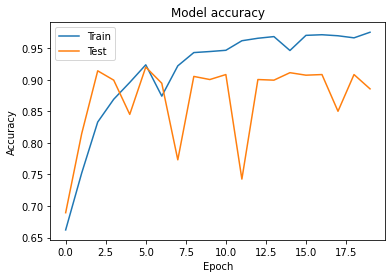

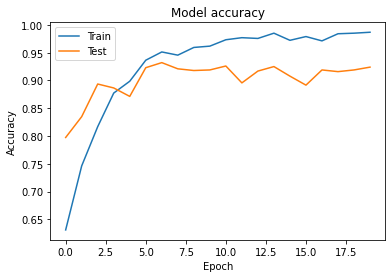

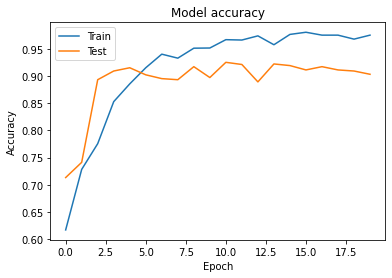

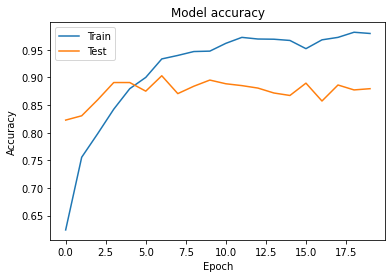

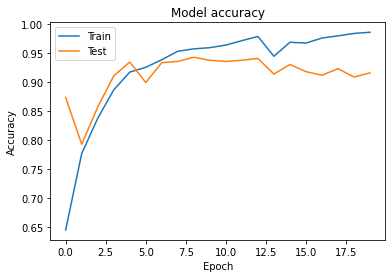

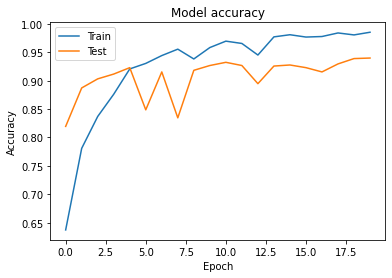

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

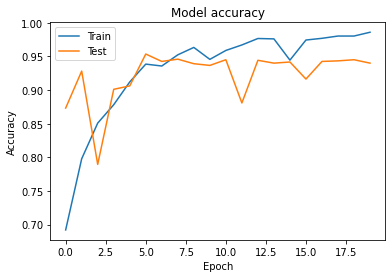

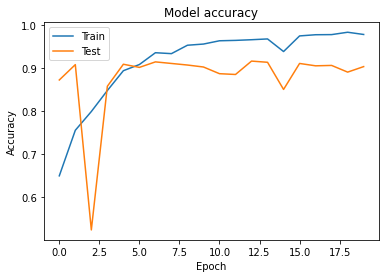

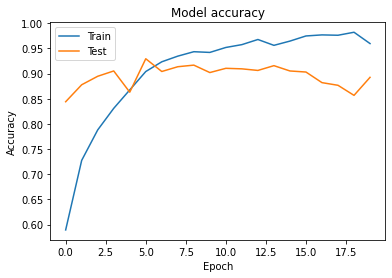

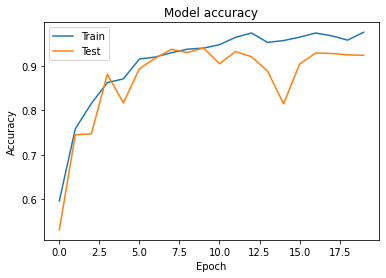

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [57]:
# Plot training & validation accuracy values
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# Plot training & validation accuracy values
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# Plot training & validation accuracy values
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# Plot training & validation accuracy values
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# Plot training & validation accuracy values
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# Plot training & validation accuracy values
plt.plot(history6.history['accuracy'])
plt.plot(history6.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.savefig("figure27.pdf")
files.download("figure27.pdf")
plt.savefig("figure27.eps")
files.download("figure27.eps")

# Plot training & validation accuracy values
plt.plot(history7.history['accuracy'])
plt.plot(history7.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# Plot training & validation accuracy values
plt.plot(history8.history['accuracy'])
plt.plot(history8.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history9.history['accuracy'])
plt.plot(history9.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history10.history['accuracy'])
plt.plot(history10.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.savefig("figure28.pdf")
files.download("figure28.pdf")
plt.savefig("figure28.eps")
files.download("figure28.eps")

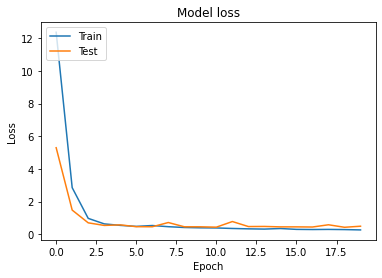

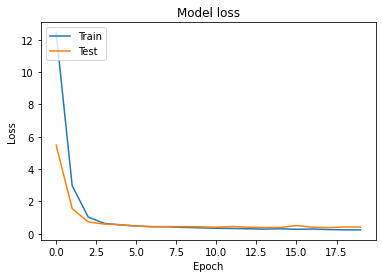

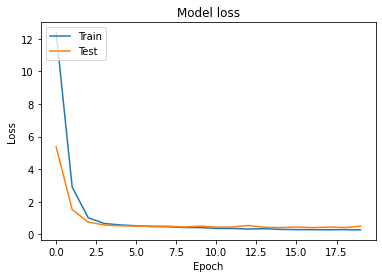

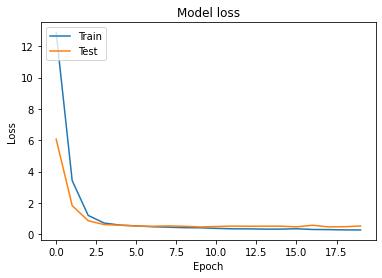

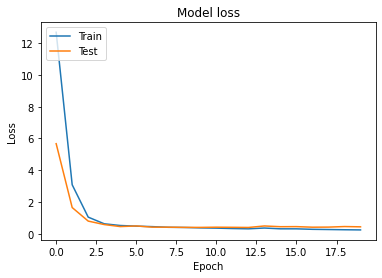

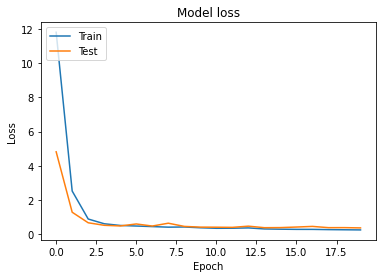

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

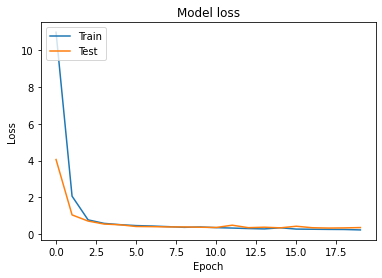

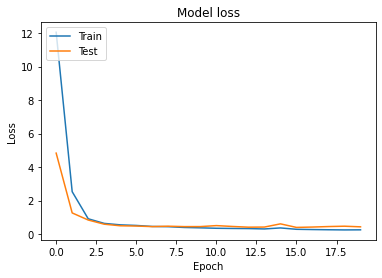

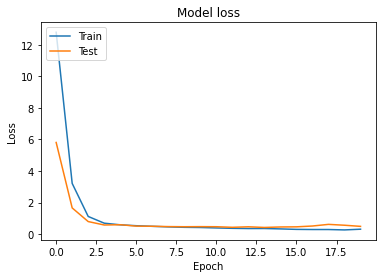

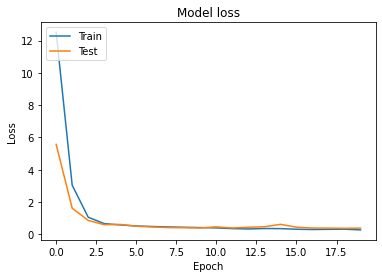

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [58]:
# Plot training & validation accuracy values
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.savefig("figure29.pdf")
files.download("figure29.pdf")
plt.savefig("figure29.eps")
files.download("figure29.eps")

# Plot training & validation accuracy values
plt.plot(history7.history['loss'])
plt.plot(history7.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history8.history['loss'])
plt.plot(history8.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history9.history['loss'])
plt.plot(history9.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history10.history['loss'])
plt.plot(history10.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.savefig("figure30.pdf")
files.download("figure30.pdf")
plt.savefig("figure30.eps")
files.download("figure30.eps")

**CNN** **GLoVe**

In [60]:
def get_cnn_model(embedding_matrix, max_len, vocab_size):
  model_glove = Sequential()
  model_glove.add(Embedding(vocab_size + 1, embedding_dim, weights=[embedding_matrix], input_length=max_len, trainable=True))
  model_glove.add(Dropout(0.2))
  model_glove.add(Conv1D(64, 5, activation='relu',kernel_regularizer=l2(0.01),bias_regularizer=l2(0.01)))
  model_glove.add(MaxPooling1D(pool_size=4))
  model_glove.add(BatchNormalization())
  # model_glove.add(Dense(64, activation='relu',kernel_regularizer=l2(0.17),bias_regularizer=l2(0.01)))
  # model_glove.add(Dropout(0.3))
  model_glove.add(LSTM(100,kernel_regularizer=l2(0.01),recurrent_regularizer=l2(0.01)))
  model_glove.add(Dense(1, activation='sigmoid',kernel_regularizer=l2(0.01),bias_regularizer=l2(0.01)))

  model_glove.summary()
  return model_glove

In [61]:
cnn_model1 = get_cnn_model(embedding_matrix1, max_len1, vocab_size1)
cnn_model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
cnn_model2 = get_cnn_model(embedding_matrix2, max_len2, vocab_size2)
cnn_model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
cnn_model3 = get_cnn_model(embedding_matrix3, max_len3, vocab_size3)
cnn_model3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
cnn_model4 = get_cnn_model(embedding_matrix4, max_len4, vocab_size4)
cnn_model4.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
cnn_model5 = get_cnn_model(embedding_matrix5, max_len5, vocab_size5)
cnn_model5.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
cnn_model6 = get_cnn_model(embedding_matrix6, max_len6, vocab_size6)
cnn_model6.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
cnn_model7 = get_cnn_model(embedding_matrix7, max_len7, vocab_size7)
cnn_model7.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
cnn_model8 = get_cnn_model(embedding_matrix8, max_len8, vocab_size8)
cnn_model8.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
cnn_model9 = get_cnn_model(embedding_matrix9, max_len9, vocab_size9)
cnn_model9.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
cnn_model10 = get_cnn_model(embedding_matrix10, max_len10, vocab_size10)
cnn_model10.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 262, 100)          844400    
                                                                 
 dropout_30 (Dropout)        (None, 262, 100)          0         
                                                                 
 conv1d_10 (Conv1D)          (None, 258, 64)           32064     
                                                                 
 max_pooling1d_10 (MaxPoolin  (None, 64, 64)           0         
 g1D)                                                            
                                                                 
 batch_normalization_10 (Bat  (None, 64, 64)           256       
 chNormalization)                                                
                                                                 
 lstm (LSTM)                 (None, 100)             

In [62]:
cnn_history1 = cnn_model1.fit(processed_x_train1,y_train1,validation_data=(processed_x_test1,y_test1),epochs=15,batch_size=32,verbose=1)
cnn_history2 = cnn_model2.fit(processed_x_train2,y_train2,validation_data=(processed_x_test2,y_test2),epochs=15,batch_size=32,verbose=1)
cnn_history3 = cnn_model3.fit(processed_x_train3,y_train3,validation_data=(processed_x_test3,y_test3),epochs=15,batch_size=32,verbose=1)
cnn_history4 = cnn_model4.fit(processed_x_train4,y_train4,validation_data=(processed_x_test4,y_test4),epochs=15,batch_size=32,verbose=1)
cnn_history5 = cnn_model5.fit(processed_x_train5,y_train5,validation_data=(processed_x_test5,y_test5),epochs=15,batch_size=32,verbose=1)
cnn_history6 = cnn_model6.fit(processed_x_train6,y_train6,validation_data=(processed_x_test6,y_test6),epochs=15,batch_size=32,verbose=1)
cnn_history7 = cnn_model7.fit(processed_x_train7,y_train7,validation_data=(processed_x_test7,y_test7),epochs=15,batch_size=32,verbose=1)
cnn_history8 = cnn_model8.fit(processed_x_train8,y_train8,validation_data=(processed_x_test8,y_test8),epochs=15,batch_size=32,verbose=1)
cnn_history9 = cnn_model9.fit(processed_x_train9,y_train9,validation_data=(processed_x_test9,y_test9),epochs=15,batch_size=32,verbose=1)
cnn_history10 = cnn_model10.fit(processed_x_train10,y_train10,validation_data=(processed_x_test10,y_test10),epochs=15,batch_size=32,verbose=1)

Epoch 1/15
96/96 [==============================] - 4s 17ms/step - loss: 2.0167 - accuracy: 0.7439 - val_loss: 1.4130 - val_accuracy: 0.5937
Epoch 2/15
96/96 [==============================] - 1s 11ms/step - loss: 0.8678 - accuracy: 0.8748 - val_loss: 0.7372 - val_accuracy: 0.9034
Epoch 3/15
96/96 [==============================] - 1s 11ms/step - loss: 0.6395 - accuracy: 0.8997 - val_loss: 0.6677 - val_accuracy: 0.8639
Epoch 4/15
96/96 [==============================] - 1s 11ms/step - loss: 0.5402 - accuracy: 0.9086 - val_loss: 0.5738 - val_accuracy: 0.8866
Epoch 5/15
96/96 [==============================] - 1s 11ms/step - loss: 0.4414 - accuracy: 0.9316 - val_loss: 0.5932 - val_accuracy: 0.8521
Epoch 6/15
96/96 [==============================] - 1s 11ms/step - loss: 0.3892 - accuracy: 0.9454 - val_loss: 0.4343 - val_accuracy: 0.9122
Epoch 7/15
96/96 [==============================] - 1s 11ms/step - loss: 0.3352 - accuracy: 0.9546 - val_loss: 0.4910 - val_accuracy: 0.8797
Epoch 8/15
96

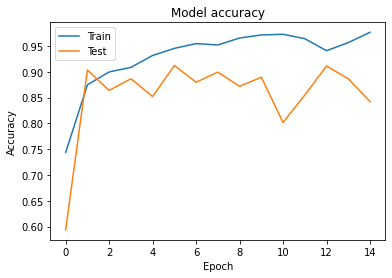

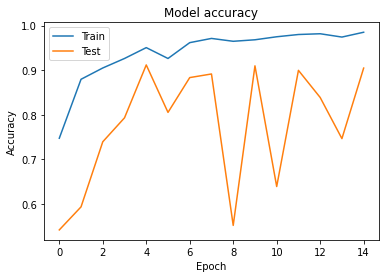

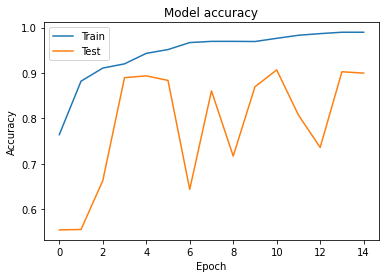

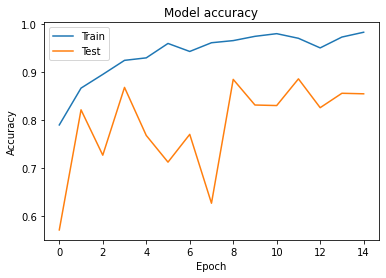

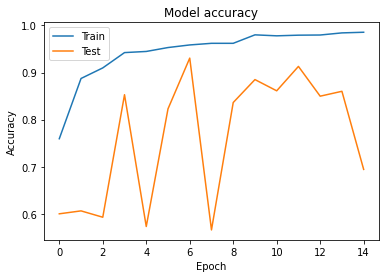

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

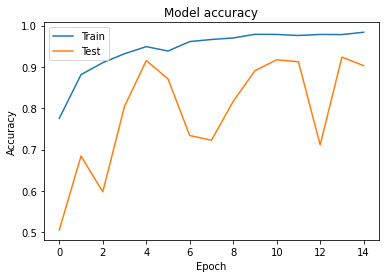

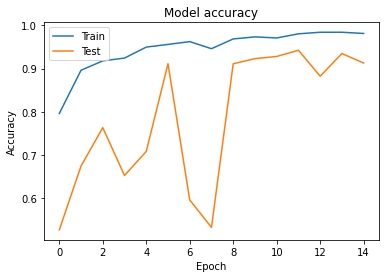

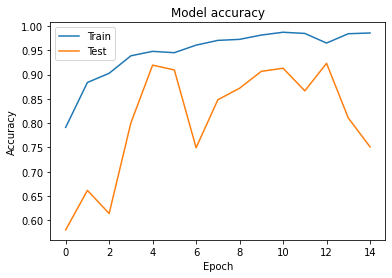

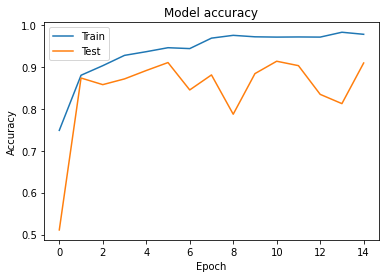

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

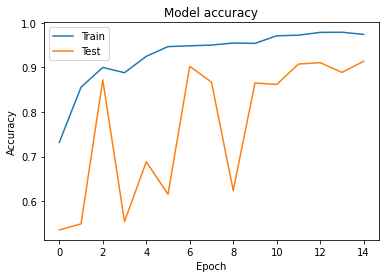

In [63]:
# Plot training & validation accuracy values
plt.plot(cnn_history1.history['accuracy'])
plt.plot(cnn_history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Plot training & validation accuracy values
plt.plot(cnn_history2.history['accuracy'])
plt.plot(cnn_history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Plot training & validation accuracy values
plt.plot(cnn_history3.history['accuracy'])
plt.plot(cnn_history3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Plot training & validation accuracy values
plt.plot(cnn_history4.history['accuracy'])
plt.plot(cnn_history4.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Plot training & validation accuracy values
plt.plot(cnn_history5.history['accuracy'])
plt.plot(cnn_history5.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.savefig("figure23.pdf")
files.download("figure23.pdf")
plt.savefig("figure23.eps")
files.download("figure23.eps")

# Plot training & validation accuracy values
plt.plot(cnn_history6.history['accuracy'])
plt.plot(cnn_history6.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Plot training & validation accuracy values
plt.plot(cnn_history7.history['accuracy'])
plt.plot(cnn_history7.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Plot training & validation accuracy values
plt.plot(cnn_history8.history['accuracy'])
plt.plot(cnn_history8.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Plot training & validation accuracy values
plt.plot(cnn_history9.history['accuracy'])
plt.plot(cnn_history9.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.savefig("figure24.pdf")
files.download("figure24.pdf")
plt.savefig("figure24.eps")
files.download("figure24.eps")

# Plot training & validation accuracy values
plt.plot(cnn_history10.history['accuracy'])
plt.plot(cnn_history10.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


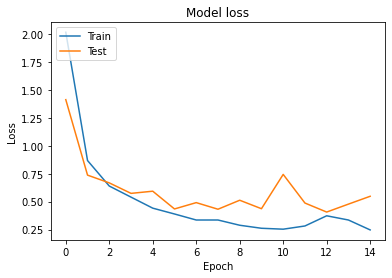

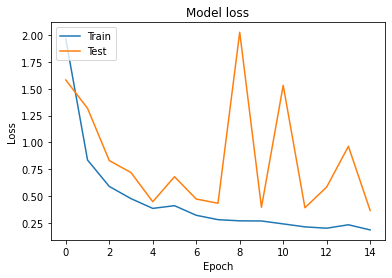

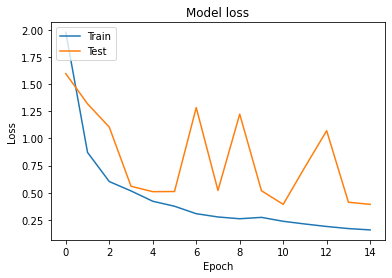

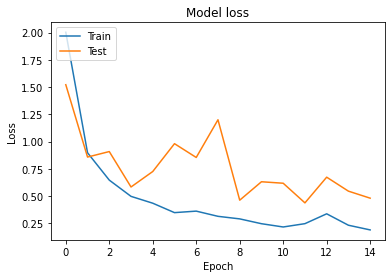

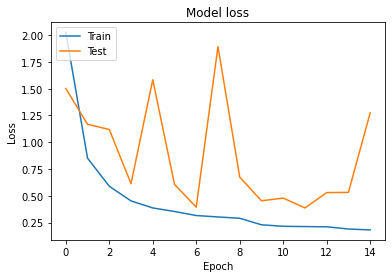

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

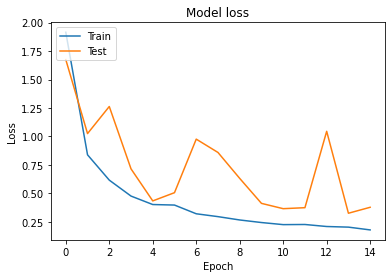

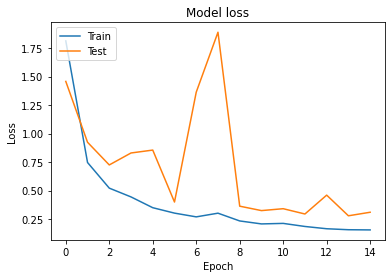

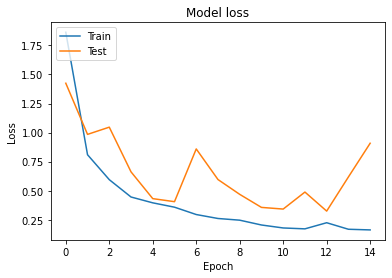

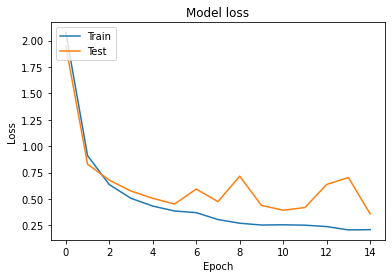

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

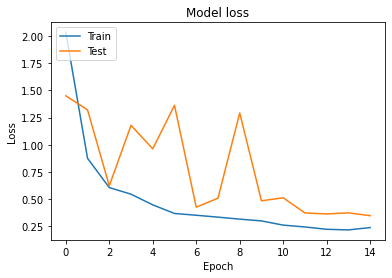

In [64]:
# Plot training & validation accuracy values
plt.plot(cnn_history1.history['loss'])
plt.plot(cnn_history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(cnn_history2.history['loss'])
plt.plot(cnn_history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(cnn_history3.history['loss'])
plt.plot(cnn_history3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(cnn_history4.history['loss'])
plt.plot(cnn_history4.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Plot training & validation accuracy values
plt.plot(cnn_history5.history['loss'])
plt.plot(cnn_history5.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.savefig("figure25.pdf")
files.download("figure25.pdf")
plt.savefig("figure25.eps")
files.download("figure25.eps")

# Plot training & validation accuracy values
plt.plot(cnn_history6.history['loss'])
plt.plot(cnn_history6.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Plot training & validation accuracy values
plt.plot(cnn_history7.history['loss'])
plt.plot(cnn_history7.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Plot training & validation accuracy values
plt.plot(cnn_history8.history['loss'])
plt.plot(cnn_history8.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Plot training & validation accuracy values
plt.plot(cnn_history9.history['loss'])
plt.plot(cnn_history9.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.savefig("figure26.pdf")
files.download("figure26.pdf")
plt.savefig("figure26.eps")
files.download("figure26.eps")

# Plot training & validation accuracy values
plt.plot(cnn_history10.history['loss'])
plt.plot(cnn_history10.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**2 Layer LSTM**

In [74]:
# Initate model
def get_lstm_model(embedding_matrix, max_len, vocab_size):
  model_lstm = Sequential()


  model_lstm.add(Embedding(vocab_size + 1, embedding_dim, weights=[embedding_matrix], input_length=max_len, trainable=True))

  input_shape = embedding_matrix[0].shape


  model_lstm.add(LSTM(60, return_sequences=True, name='lstm_layer1'))#,kernel_regularizer=l2(0.01),recurrent_regularizer=l2(0.01)))
  model_lstm.add(LSTM(30, return_sequences=True, name='lstm_layer2'))#kernel_regularizer=l2(0.01),recurrent_regularizer=l2(0.01)))
  #model_lstm.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))#,kernel_regularizer=l2(0.01),bias_regularizer=l2(0.01)))
  #model_lstm.add(MaxPooling1D(3))
  #model_lstm.add(GlobalMaxPooling1D())
  model_lstm.add(BatchNormalization())
  model_lstm.add(Flatten())
  model_lstm.add(Dense(64, activation='relu',kernel_regularizer=l2(0.17),bias_regularizer=l2(0.01)))
  model_lstm.add(Dropout(0.3))
  model_lstm.add(Dense(32, activation='relu',kernel_regularizer=l2(0.19),bias_regularizer=l2(0.01)))
  model_lstm.add(Dropout(0.3))
  #model.add(Dense(16, kernel_regularizer=l2(0.001), activation='relu'))
  # model_lstm.add(Dense(20, activation='relu', input_shape=input_shape))
  #model.add(Dense(20, activation='relu'))
  model_lstm.add(Dropout(0.3))
  model_lstm.add(Dense(1, activation='sigmoid'))

  return model_lstm

In [75]:
model_lstm1 = get_lstm_model(embedding_matrix1, max_len1, vocab_size1)
model_lstm1.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
hist1 = model_lstm1.fit(processed_x_train1,y_train1,validation_data=(processed_x_test1,y_test1),epochs=15,batch_size=32,verbose=1)
model_lstm2 = get_lstm_model(embedding_matrix2, max_len2, vocab_size2)
model_lstm2.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
hist2 = model_lstm2.fit(processed_x_train2,y_train2,validation_data=(processed_x_test2,y_test2),epochs=15,batch_size=32,verbose=1)
model_lstm3 = get_lstm_model(embedding_matrix3, max_len3, vocab_size3)
model_lstm3.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
hist3 = model_lstm3.fit(processed_x_train3,y_train3,validation_data=(processed_x_test3,y_test3),epochs=15,batch_size=32,verbose=1)
model_lstm4 = get_lstm_model(embedding_matrix4, max_len4, vocab_size4)
model_lstm4.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
hist4 = model_lstm4.fit(processed_x_train4,y_train4,validation_data=(processed_x_test4,y_test4),epochs=15,batch_size=32,verbose=1)
model_lstm5 = get_lstm_model(embedding_matrix5, max_len5, vocab_size5)
model_lstm5.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
hist5 = model_lstm5.fit(processed_x_train5,y_train5,validation_data=(processed_x_test5,y_test5),epochs=15,batch_size=32,verbose=1)
model_lstm6 = get_lstm_model(embedding_matrix6, max_len6, vocab_size6)
model_lstm6.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
hist6 = model_lstm6.fit(processed_x_train6,y_train6,validation_data=(processed_x_test6,y_test6),epochs=15,batch_size=32,verbose=1)
model_lstm7 = get_lstm_model(embedding_matrix7, max_len7, vocab_size7)
model_lstm7.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
hist7 = model_lstm7.fit(processed_x_train7,y_train7,validation_data=(processed_x_test7,y_test7),epochs=15,batch_size=32,verbose=1)
model_lstm8 = get_lstm_model(embedding_matrix8, max_len8, vocab_size8)
model_lstm8.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
hist8 = model_lstm8.fit(processed_x_train8,y_train8,validation_data=(processed_x_test8,y_test8),epochs=15,batch_size=32,verbose=1)
model_lstm9 = get_lstm_model(embedding_matrix9, max_len9, vocab_size9)
model_lstm9.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
hist9 = model_lstm9.fit(processed_x_train9,y_train9,validation_data=(processed_x_test9,y_test9),epochs=15,batch_size=32,verbose=1)
model_lstm10 = get_lstm_model(embedding_matrix10, max_len10, vocab_size10)
model_lstm10.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
hist10 = model_lstm10.fit(processed_x_train10,y_train10,validation_data=(processed_x_test10,y_test10),epochs=15,batch_size=32,verbose=1)

Epoch 1/15
96/96 [==============================] - 6s 34ms/step - loss: 9.2891 - accuracy: 0.5237 - val_loss: 3.5957 - val_accuracy: 0.5957
Epoch 2/15
96/96 [==============================] - 2s 25ms/step - loss: 2.2832 - accuracy: 0.7525 - val_loss: 1.4309 - val_accuracy: 0.8393
Epoch 3/15
96/96 [==============================] - 2s 25ms/step - loss: 0.8656 - accuracy: 0.8734 - val_loss: 0.7100 - val_accuracy: 0.8826
Epoch 4/15
96/96 [==============================] - 3s 33ms/step - loss: 0.4434 - accuracy: 0.9178 - val_loss: 0.4404 - val_accuracy: 0.9004
Epoch 5/15
96/96 [==============================] - 2s 25ms/step - loss: 0.3408 - accuracy: 0.9329 - val_loss: 0.3551 - val_accuracy: 0.9034
Epoch 6/15
96/96 [==============================] - 2s 25ms/step - loss: 0.3308 - accuracy: 0.9487 - val_loss: 0.3484 - val_accuracy: 0.9201
Epoch 7/15
96/96 [==============================] - 2s 25ms/step - loss: 0.1956 - accuracy: 0.9734 - val_loss: 0.3224 - val_accuracy: 0.8866
Epoch 8/15
96

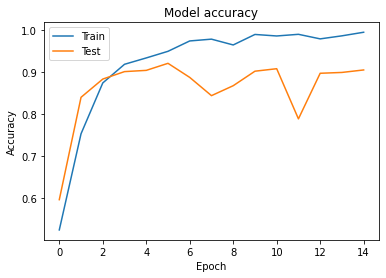

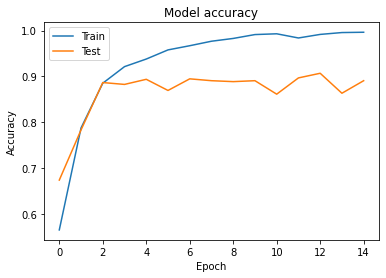

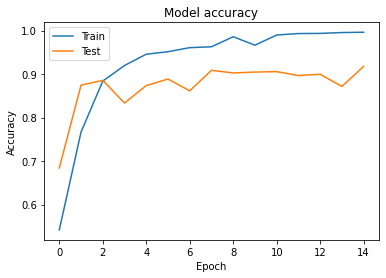

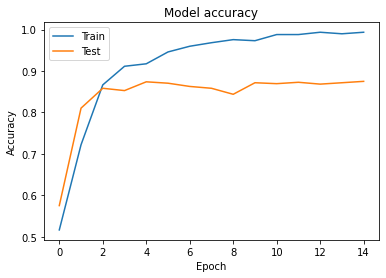

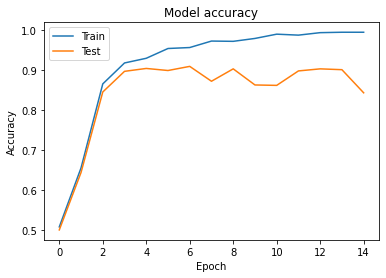

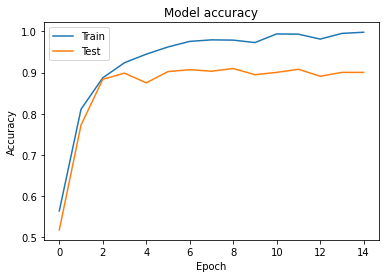

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

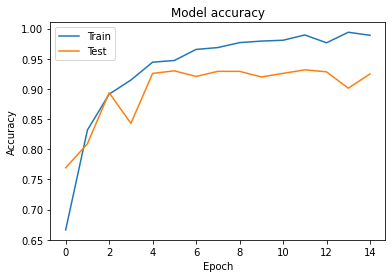

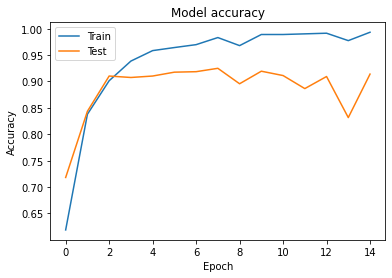

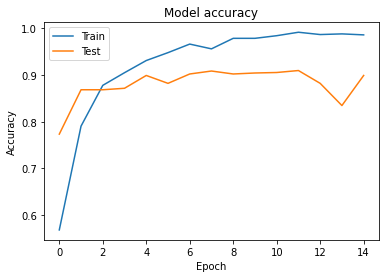

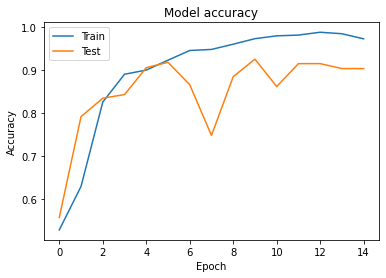

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [76]:
# Plot training & validation accuracy values
plt.plot(hist1.history['accuracy'])
plt.plot(hist1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Plot training & validation accuracy values
plt.plot(hist2.history['accuracy'])
plt.plot(hist2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Plot training & validation accuracy values
plt.plot(hist3.history['accuracy'])
plt.plot(hist3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Plot training & validation accuracy values
plt.plot(hist4.history['accuracy'])
plt.plot(hist4.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Plot training & validation accuracy values
plt.plot(hist5.history['accuracy'])
plt.plot(hist5.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Plot training & validation accuracy values
plt.plot(hist6.history['accuracy'])
plt.plot(hist6.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.savefig("figure19.pdf")
files.download("figure19.pdf")
plt.savefig("figure19.eps")
files.download("figure19.eps")

# Plot training & validation accuracy values
plt.plot(hist7.history['accuracy'])
plt.plot(hist7.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Plot training & validation accuracy values
plt.plot(hist8.history['accuracy'])
plt.plot(hist8.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Plot training & validation accuracy values
plt.plot(hist9.history['accuracy'])
plt.plot(hist9.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Plot training & validation accuracy values
plt.plot(hist10.history['accuracy'])
plt.plot(hist10.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.savefig("figure20.pdf")
files.download("figure20.pdf")
plt.savefig("figure20.eps")
files.download("figure20.eps")


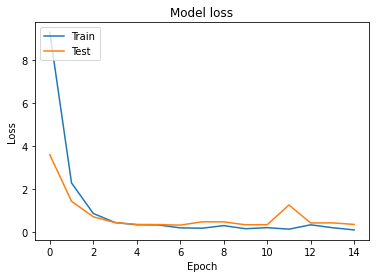

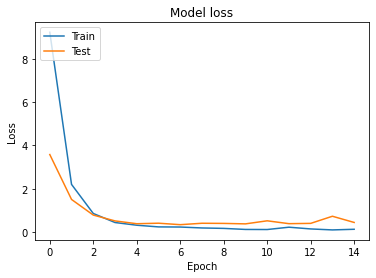

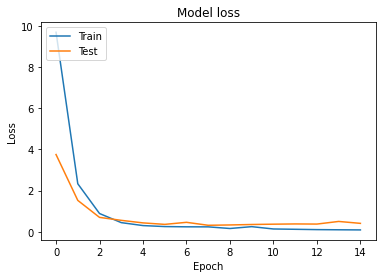

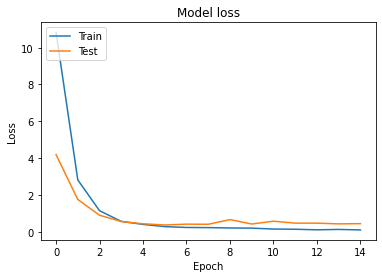

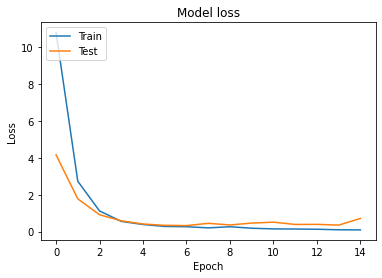

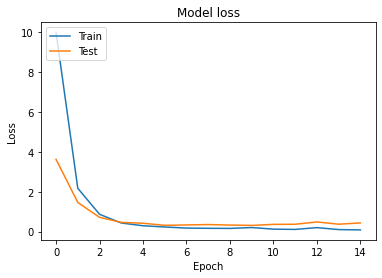

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

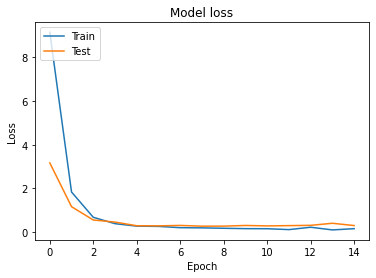

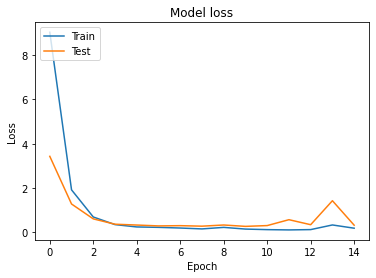

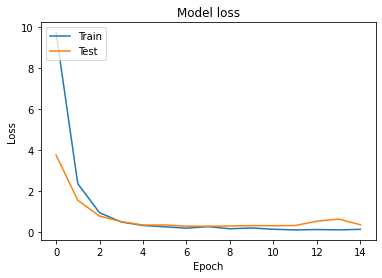

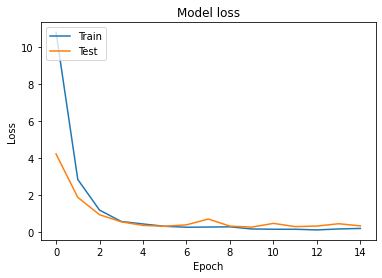

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [77]:
# Plot training & validation loss values
plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Plot training & validation loss values
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Plot training & validation loss values
plt.plot(hist3.history['loss'])
plt.plot(hist3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Plot training & validation loss values
plt.plot(hist4.history['loss'])
plt.plot(hist4.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Plot training & validation loss values
plt.plot(hist5.history['loss'])
plt.plot(hist5.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Plot training & validation loss values
plt.plot(hist6.history['loss'])
plt.plot(hist6.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.savefig("figure21.pdf")
files.download("figure21.pdf")
plt.savefig("figure21.eps")
files.download("figure21.eps")

# Plot training & validation loss values
plt.plot(hist7.history['loss'])
plt.plot(hist7.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Plot training & validation loss values
plt.plot(hist8.history['loss'])
plt.plot(hist8.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Plot training & validation loss values
plt.plot(hist9.history['loss'])
plt.plot(hist9.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Plot training & validation loss values
plt.plot(hist10.history['loss'])
plt.plot(hist10.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.savefig("figure22.pdf")
files.download("figure22.pdf")
plt.savefig("figure22.eps")
files.download("figure22.eps")